# 👶 Driver Age Analysis

In this notebook, we analyze how the average age of Formula 1 drivers has evolved over time, based on the historical data from the Kaggle F1 dataset (1950–2020).

In [5]:
import os
print(os.getcwd())

c:\Users\lucaf\OneDrive\Documenti\GitHub\f1-ml\notebooks\kaggle_f1_championship\notebooks\kaggle_f1


In [4]:
# 📦 Required imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# 📁 Dataset path
DATA_DIR = Path("../../../data/raw/rohanrao_formula-1-world-championship-1950-2020")

# 📂 Load required datasets
drivers = pd.read_csv(DATA_DIR / "drivers.csv", parse_dates=["dob"])
races = pd.read_csv(DATA_DIR / "races.csv")
results = pd.read_csv(DATA_DIR / "results.csv")

FileNotFoundError: [Errno 2] No such file or directory: '..\\..\\..\\data\\raw\\rohanrao_formula-1-world-championship-1950-2020\\drivers.csv'

In [ ]:
import sys
import importlib
from pathlib import Path

# Add src/ to the path
sys.path.append(str(Path("../../src")))

# Force reload of updated scoring module
import utils.scoring
importlib.reload(utils.scoring)

from utils.scoring import normalize_points

In [ ]:
# 🔗 Merge results with races to get the season year
results_year = results.merge(races[["raceId", "year"]], on="raceId")

# 🔗 Merge with drivers to get date of birth
df = results_year.merge(drivers[["driverId", "dob"]], on="driverId")

# 📅 Approximate race date as January 1st of each season
df["race_date"] = pd.to_datetime(df["year"].astype(str) + "-01-01")

# 🧮 Compute driver age in years at time of race
df["age"] = (df["race_date"] - df["dob"]).dt.days / 365.25

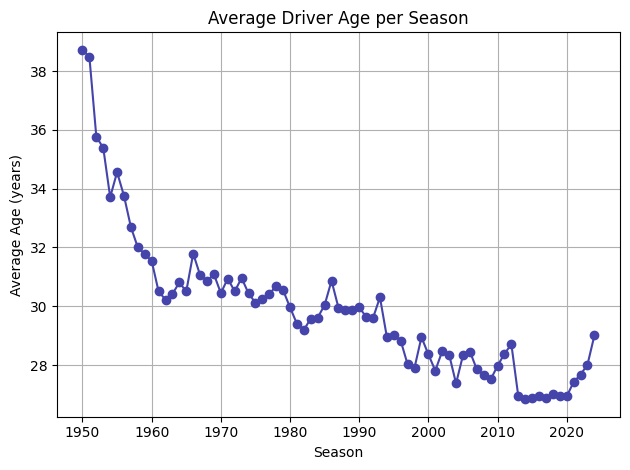

In [ ]:
# 📉 Plot average driver age per season
avg_age_per_year.plot(marker="o", color="#4444aa")
plt.title("Average Driver Age per Season")
plt.xlabel("Season")
plt.ylabel("Average Age (years)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 📊 Aggregate per driver per season
points_per_driver_season = df.groupby(["driverId", "year"]).agg({
    "points": "sum",
    "positionOrder": lambda x: (x == 1).sum(),  # Count wins
    "age": "mean",  # Average age during season
}).reset_index()

# 🏷️ Rename for clarity
points_per_driver_season.rename(columns={"positionOrder": "wins"}, inplace=True)

points_per_driver_season.to_csv("../../data/processed/points_per_driver_season.csv", index=False)

NameError: name 'df' is not defined

In [ ]:
# ➕ Normalize points using external utility
from utils.scoring import normalize_points
points_per_driver_season["normalized_points"] = normalize_points(points_per_driver_season)

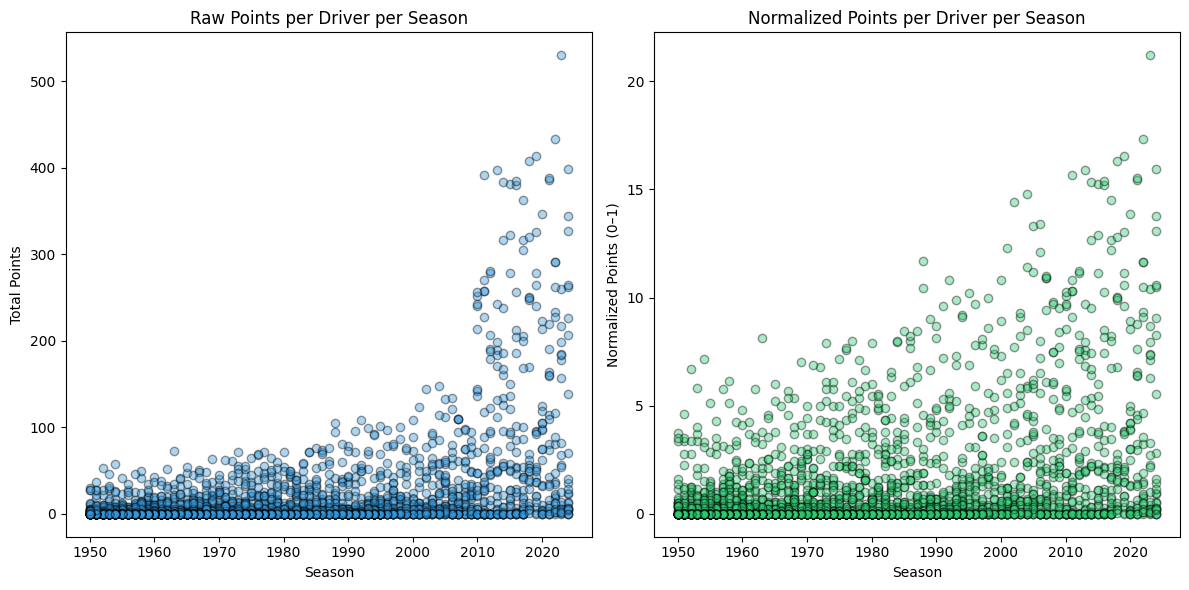

In [ ]:
plt.figure(figsize=(12, 6))

# Before normalization
plt.subplot(1, 2, 1)
plt.scatter(points_per_driver_season["year"], points_per_driver_season["points"], alpha=0.4, color="#3498db", edgecolors="k")
plt.title("Raw Points per Driver per Season")
plt.xlabel("Season")
plt.ylabel("Total Points")

# After normalization
plt.subplot(1, 2, 2)
plt.scatter(points_per_driver_season["year"], points_per_driver_season["normalized_points"], alpha=0.4, color="#2ecc71", edgecolors="k")
plt.title("Normalized Points per Driver per Season")
plt.xlabel("Season")
plt.ylabel("Normalized Points (0–1)")

plt.tight_layout()
plt.show()


In [ ]:
# 📊 Number of races per season
races_per_year = races.groupby("year")["raceId"].nunique()

# 🔗 Merge races per year into points dataframe
points_per_driver_season = points_per_driver_season.merge(
    races_per_year.rename("races_in_season"),
    on="year",
    how="left"
)

In [ ]:
# ➗ Points per race (raw)
points_per_driver_season["points_per_race"] = (
    points_per_driver_season["points"] / points_per_driver_season["races_in_season"]
)

# ➗ Normalized points per race (optional)
points_per_driver_season["normalized_points_per_race"] = (
    points_per_driver_season["normalized_points"] / points_per_driver_season["races_in_season"]
)

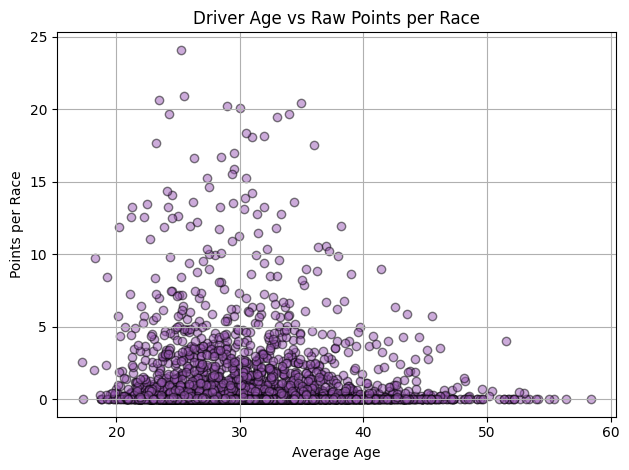

In [ ]:
plt.scatter(points_per_driver_season["age"], points_per_driver_season["points_per_race"],
            alpha=0.5, color="#9b59b6", edgecolors="k")
plt.title("Driver Age vs Raw Points per Race")
plt.xlabel("Average Age")
plt.ylabel("Points per Race")
plt.grid(True)
plt.tight_layout()
plt.show()


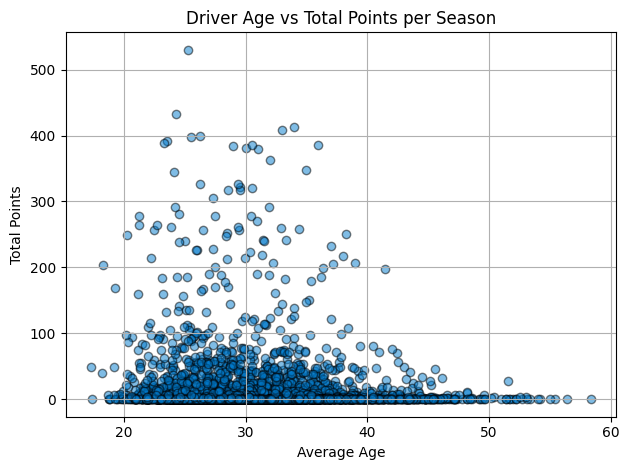

In [ ]:
# 📈 Age vs total points
plt.scatter(points_per_driver_season["age"], points_per_driver_season["points"], alpha=0.5, color="#007acc", edgecolors="k")
plt.title("Driver Age vs Total Points per Season")
plt.xlabel("Average Age")
plt.ylabel("Total Points")
plt.grid(True)
plt.tight_layout()
plt.show()

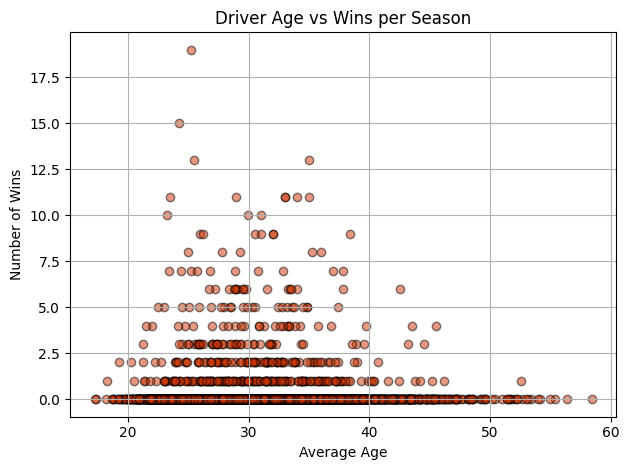

In [ ]:
# 📈 Age vs wins
plt.scatter(points_per_driver_season["age"], points_per_driver_season["wins"], alpha=0.5, color="#cc3300", edgecolors="k")
plt.title("Driver Age vs Wins per Season")
plt.xlabel("Average Age")
plt.ylabel("Number of Wins")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 📊 Calcolo delle correlazioni
corr_age_points = points_per_driver_season[["age", "points"]].corr().iloc[0, 1]
corr_age_norm_points = points_per_driver_season[["age", "normalized_points"]].corr().iloc[0, 1]
corr_age_points_per_race = points_per_driver_season[["age", "points_per_race"]].corr().iloc[0, 1]
corr_age_norm_points_per_race = points_per_driver_season[["age", "normalized_points_per_race"]].corr().iloc[0, 1]

# 📌 Stampa dei risultati
print(f"📌 Correlazione tra età e punti totali: {corr_age_points:.3f}")
print(f"📌 Correlazione tra età e punti normalizzati: {corr_age_norm_points:.3f}")
print(f"📌 Correlazione tra età e punti per gara: {corr_age_points_per_race:.3f}")
print(f"📌 Correlazione tra età e punti normalizzati per gara: {corr_age_norm_points_per_race:.3f}")

📌 Correlazione tra età e punti totali: -0.099
📌 Correlazione tra età e punti normalizzati: -0.089
📌 Correlazione tra età e punti per gara: -0.087
📌 Correlazione tra età e punti normalizzati per gara: -0.053


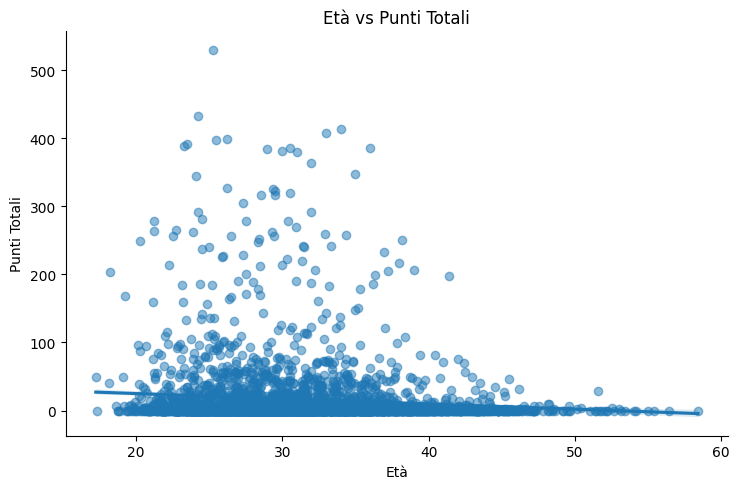

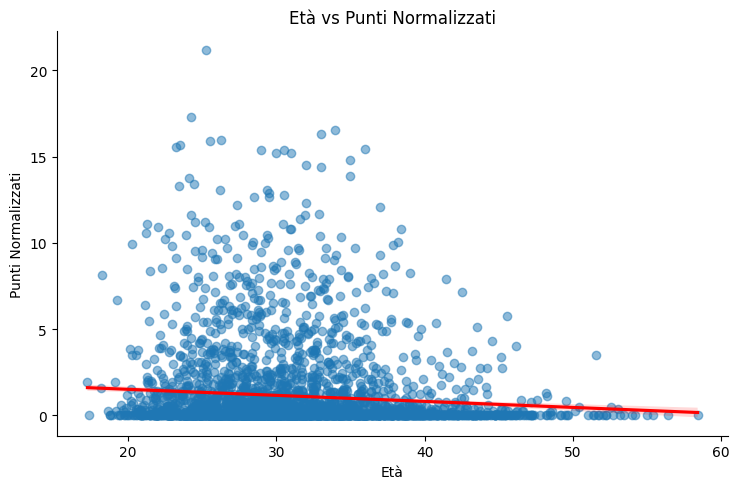

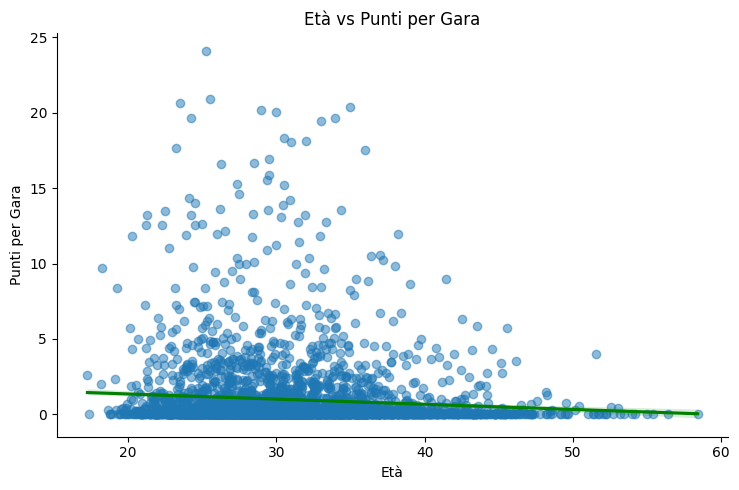

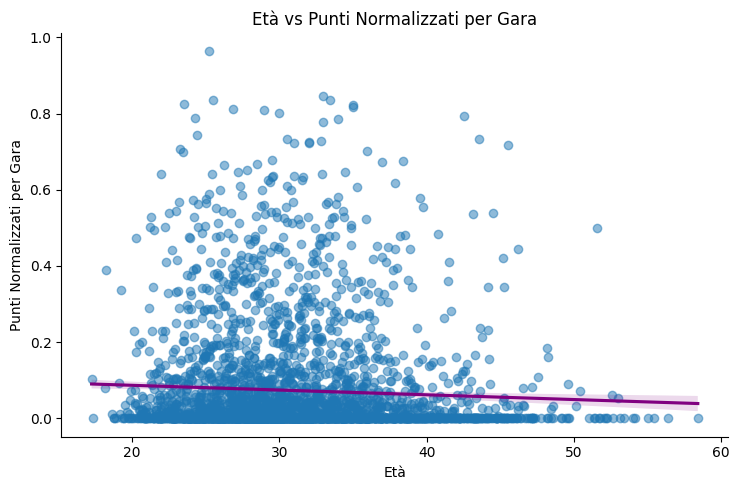

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📈 Grafico: Età vs Punti Totali
sns.lmplot(data=points_per_driver_season, x="age", y="points", height=5, aspect=1.5, scatter_kws={"alpha":0.5})
plt.title("Età vs Punti Totali")
plt.xlabel("Età")
plt.ylabel("Punti Totali")
plt.tight_layout()
plt.show()

# 📈 Grafico: Età vs Punti Normalizzati
sns.lmplot(data=points_per_driver_season, x="age", y="normalized_points", height=5, aspect=1.5, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Età vs Punti Normalizzati")
plt.xlabel("Età")
plt.ylabel("Punti Normalizzati")
plt.tight_layout()
plt.show()

# 📈 Grafico: Età vs Punti per Gara
sns.lmplot(data=points_per_driver_season, x="age", y="points_per_race", height=5, aspect=1.5, scatter_kws={"alpha":0.5}, line_kws={"color":"green"})
plt.title("Età vs Punti per Gara")
plt.xlabel("Età")
plt.ylabel("Punti per Gara")
plt.tight_layout()
plt.show()

# 📈 Grafico: Età vs Punti Normalizzati per Gara
sns.lmplot(data=points_per_driver_season, x="age", y="normalized_points_per_race", height=5, aspect=1.5, scatter_kws={"alpha":0.5}, line_kws={"color":"purple"})
plt.title("Età vs Punti Normalizzati per Gara")
plt.xlabel("Età")
plt.ylabel("Punti Normalizzati per Gara")
plt.tight_layout()
plt.show()


In [ ]:
# Define age buckets
bins = [0, 25, 30, 35, 40, 100]
labels = ["<25", "25–30", "30–35", "35–40", "40+"]

points_per_driver_season["age_group"] = pd.cut(points_per_driver_season["age"], bins=bins, labels=labels)

C:\Users\lucaf\AppData\Local\Temp\ipykernel_14824\3205734246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_norm_points_by_age = points_per_driver_season.groupby("age_group")["normalized_points"].mean()


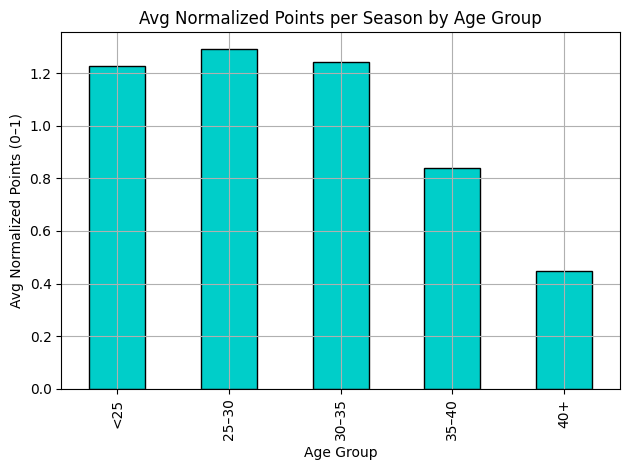

In [ ]:
avg_norm_points_by_age = points_per_driver_season.groupby("age_group")["normalized_points"].mean()

avg_norm_points_by_age.plot(kind="bar", color="#00cec9", edgecolor="black")
plt.title("Avg Normalized Points per Season by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Avg Normalized Points (0–1)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\lucaf\AppData\Local\Temp\ipykernel_14824\1089249879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_norm_points_per_race_by_age = points_per_driver_season.groupby("age_group")["normalized_points_per_race"].mean()


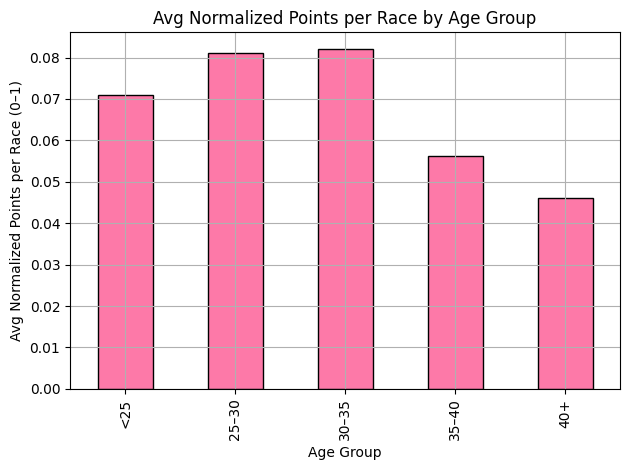

In [ ]:
avg_norm_points_per_race_by_age = points_per_driver_season.groupby("age_group")["normalized_points_per_race"].mean()

avg_norm_points_per_race_by_age.plot(kind="bar", color="#fd79a8", edgecolor="black")
plt.title("Avg Normalized Points per Race by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Avg Normalized Points per Race (0–1)")
plt.grid(True)
plt.tight_layout()
plt.show()
